In [77]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import floor

In [78]:
def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')

# The Purpose

See what we need for the VA tool.

# The Data


In [88]:
df = pd.read_csv("../Data/Master/Master.csv")
Station = df[df["Station"] == 663].reset_index()

0    3847.0
Name: MAY-FY16, dtype: float64

# The Work

## Label

"[Station Name] is [interesting, uninteresting, crazy], especially when it comes to [factor]."

"It is a [large,small] station that sees [an average, a huge, small] amount of patients for its size."



In [93]:
print "{} is an interesting VA station, especially when it comes to factor.".format(Station["Name"][0])
print "It is a {} station with a _____ amount of appointments for its size.".format(Station["qualitative_size"][0])

VA PUGET SOUND, WA is an interesting VA station, especially when it comes to factor.
It is a large station with a _____ amount of appointments for its size.


## Fact table

Does it make sense having a simple table at top? Just showing numbers like staff size?

## Wait Times

Need to figure out how to deal with multiple wait times with multiple types of appointments. Right now we have six!

In this case I'm going to just look at completed primary care.

(V20) (663) VA Puget Sound, WA had an average primary care wait of 5.66 days in August 2016,representing a 33.81 percent increase since September 2014. 
 


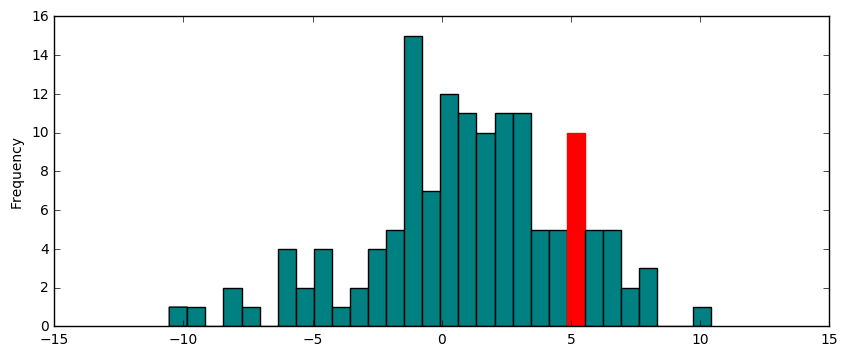

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))

print "{} had an average primary care wait of {} days in August 2016,"\
"representing a {} percent increase since September 2014. \n ".format(
    Station["Location"].to_string(index=False),
    Station["PC_Wait_Complete_1608"].to_string(index=False),round(Station["PC_Wait_Complete_Increase_%"],2))

marked_hist("Percentage_Point_Wait_Over_30_Increase_Pending",ax)

Question: How intuitive is histogram? How much should we explain it?

#### Graphic: Wait Time Over time

Our general independent variable is time.

Dependent variable has a few options.

- Primary Care Average Days
- Specialty Care Average Days
- Mental Health Care Average Days
- Percent of appointments taking/taken over 30 days to complete


Also we must decide upon completed versus pending appointments.

#### Another option: Looking at increase

We have percentage point increase for wait over 30 days. We also have the increase and percent increase for the average days. 

Probably worth showing both, though only the cases where they're interesting.

## Choice Hires

Now, if we know that wait times were bad in one area, we might want to add an additional graphic.

For mental health care, it would make sense to see where psychiatrist went.

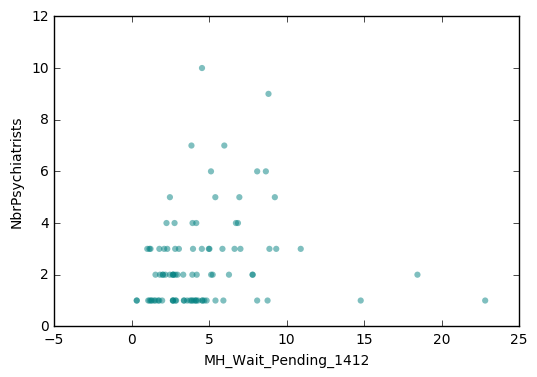

In [82]:
df.plot(kind='scatter',x='MH_Wait_Pending_1412',y="NbrPsychiatrists",color='teal',edgecolor='none',alpha=.5)

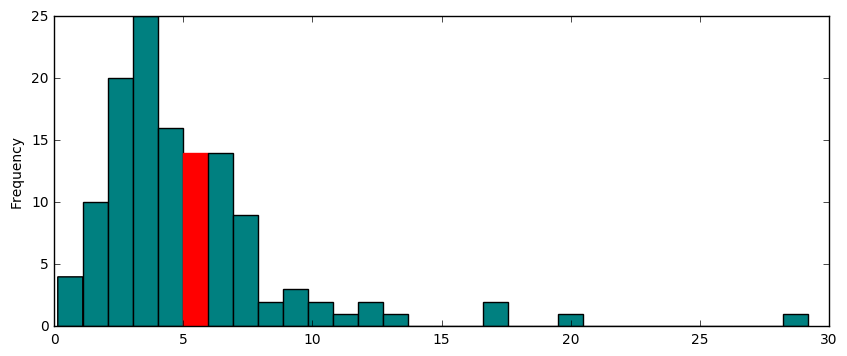

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,4))
marked_hist("Choice_Increase_%",ax)

Independent variable - wait times. Could be percent over 30.
Dependent - Choice Hires, Choice Hires relative to 2014 staffing levels

Not sure what to do with this one. We could have multiple occupations as our dependent variable. Perhaps a grouped bar?

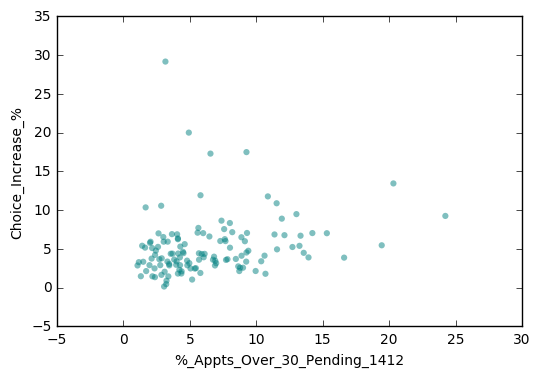

In [84]:
df.plot(kind='scatter',x="%_Appts_Over_30_Pending_1412",y="Choice_Increase_%",color='teal',edgecolor='none',alpha=.5)

## Staffing


Independent = year
Dependent = staffing level, increase in staffing, percent increase in staffing.

Perhaps a simple bar or line graph?

# Turnover
Tricky situation here. We should check against staffing levels for turnover rates. We don't want to report a 50% turnover when there are only two people in that position.



# Appointments

There are mutliple angles with appointments.

- How appointments have increased
- the growing gap in appointments
- Appointments versus staffing level



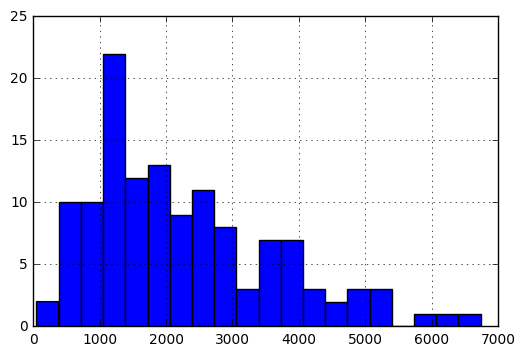

In [85]:
df["MAY-FY16"].describe()
df["MAY-FY16"].hist(bins=20)

In [86]:
df[df["MAY-FY16"].notnull()]["MAY-FY16"].describe()

count     128.000000
mean     2249.585938
std      1377.745417
min        50.000000
25%      1172.750000
50%      1899.500000
75%      2996.250000
max      6735.000000
Name: MAY-FY16, dtype: float64

# Should we use complete or pending?



### Pro Complete
- The more conservative of the two options.

### Pro Pending
- Does not exclude canceled, more accurately reflects number of appointments made
